In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
dados = pd.read_csv('diabetes_dataset.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [3]:
dados.head() #Primeiras linhas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [4]:
dados.tail() #ultimas linhas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
567,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
568,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
569,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
570,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
571,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [5]:
dados.shape #Linhas e colunas do arquivo

(572, 9)

In [6]:
dados['Age'].value_counts() #As idades e a frequencia que as idades se repetem

22    51
21    46
25    31
24    30
23    25
27    24
28    23
26    22
29    22
41    20
31    19
30    18
38    15
37    15
42    15
45    14
33    13
32    13
46    11
39    11
36    10
40    10
35     8
44     8
52     7
50     7
43     7
34     7
51     6
47     5
54     5
60     4
57     4
62     4
49     4
66     4
53     3
67     3
58     3
63     3
48     3
56     3
65     3
55     3
69     2
59     2
61     1
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [7]:
dados['Age'].value_counts().sort_index() #Colocando a idade em ordem

21    46
22    51
23    25
24    30
25    31
26    22
27    24
28    23
29    22
30    18
31    19
32    13
33    13
34     7
35     8
36    10
37    15
38    15
39    11
40    10
41    20
42    15
43     7
44     8
45    14
46    11
47     5
48     3
49     4
50     7
51     6
52     7
53     3
54     5
55     3
56     3
57     4
58     3
59     2
60     4
61     1
62     4
63     3
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64

<AxesSubplot: ylabel='Frequency'>

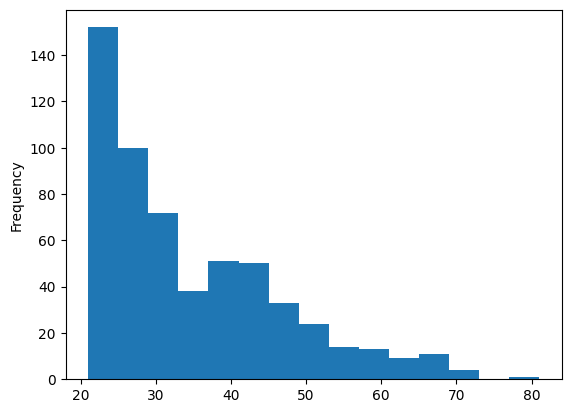

In [8]:
dados['Age'].plot(kind='hist', bins = 15) #plotando histograma da idade

In [9]:
import seaborn as sns

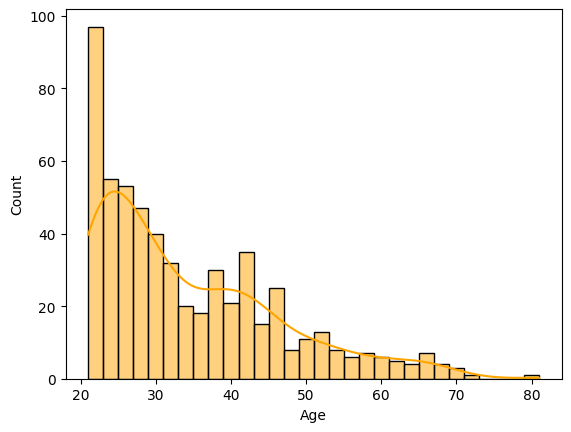

In [10]:
sns.histplot(dados, x='Age', bins=30, color="orange", kde=True, stat="count");
#linha indica a distribuição média

Nas idades não há nada de incomum.

In [11]:
dados['Outcome'].value_counts()

0    367
1    205
Name: Outcome, dtype: int64

In [12]:
#sns.countplot(x='Outcome', data=dados); #Quem teve diabete e quem não teve

In [13]:
dados.Pregnancies.value_counts().sort_index()

0     82
1     86
2     70
3     50
4     55
5     48
6     44
7     37
8     28
9     22
10    20
11    10
12     8
13     9
14     2
17     1
Name: Pregnancies, dtype: int64

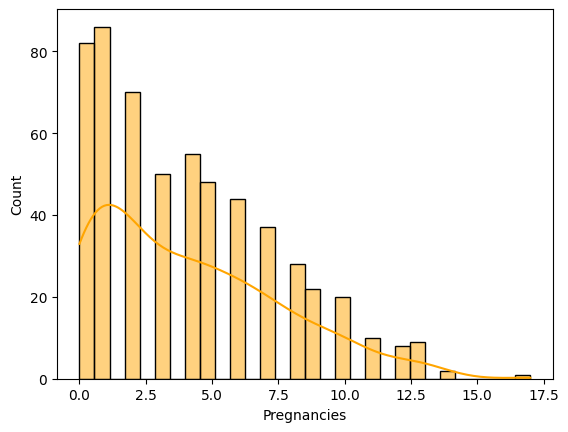

In [14]:
sns.histplot(dados, x='Pregnancies', bins=30, color="orange", kde=True, stat="count");

Já houve registros de mulheres dando a luz a mais de 20 filhos, então 17 é aceitável.

In [15]:
dados.Glucose.value_counts().sort_index()

44.0     1
57.0     2
61.0     1
62.0     1
65.0     1
        ..
194.0    3
195.0    1
196.0    2
197.0    4
199.0    1
Name: Glucose, Length: 130, dtype: int64

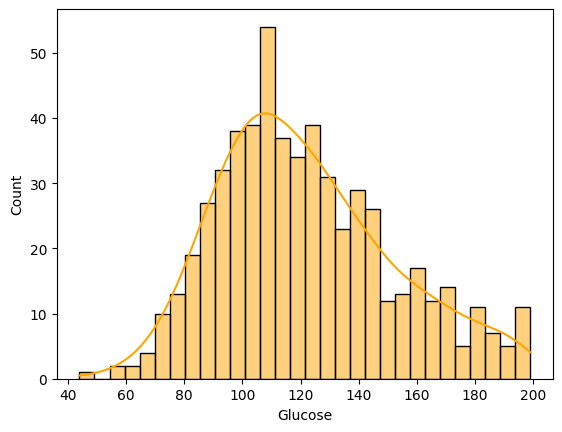

In [16]:
sns.histplot(dados, x='Glucose', bins=30, color="orange", kde=True, stat="count");

O estado de normalidade da glicemia em jejum é de 70 mg/dl a 100 mg/ld. Uma pessoa é classificada como pré-diabética ao medir a sua glicemia em jejum e atingir entre 100 e 125 mg/dl. Já aqueles que atingem a partir de 126 mg/dl são considerados diabéticos. Não há como saber se foram feitas em pacientes em jejum  ou não, vou considerar que todos estavam em jejum.

In [17]:
dados.BloodPressure.value_counts().sort_index()

30.0      2
40.0      1
44.0      2
46.0      2
48.0      4
50.0      8
52.0      8
54.0      7
55.0      2
56.0      7
58.0      9
60.0     28
61.0      1
62.0     25
64.0     28
65.0      6
66.0     22
68.0     34
70.0     40
72.0     33
74.0     38
75.0      8
76.0     29
78.0     33
80.0     30
82.0     21
84.0     21
85.0      4
86.0     17
88.0     17
90.0     16
92.0      7
94.0      6
95.0      1
96.0      4
98.0      3
100.0     3
102.0     1
104.0     2
106.0     2
108.0     2
110.0     1
114.0     1
122.0     1
Name: BloodPressure, dtype: int64

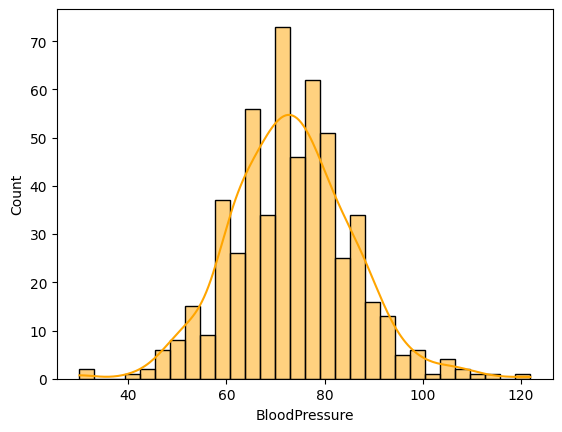

In [18]:
sns.histplot(dados, x='BloodPressure', bins=30, color="orange", kde=True, stat="count");

Pressão diastólica → força que o sangue promove dentro das artérias durante a diástole ventricular. Seu valor para uma pessoa saudável adulta são para valores menores que 80 mmHg.
Para a maior parte dos adultos, considera-se que a pessoa tem hipertensão arterial quando a pressão arterial em repouso é consistentemente superior a 140/90 mmHg.
https://pt.wikipedia.org/wiki/Hipertens%C3%A3o_arterial

In [19]:
dados.SkinThickness.value_counts().sort_index()

7.0      2
8.0      1
10.0     3
11.0     5
12.0     1
13.0     4
14.0     5
15.0     9
16.0     4
17.0    11
18.0    10
19.0    12
20.0    10
21.0     7
22.0    10
23.0    12
24.0     7
25.0    10
26.0     9
27.0    16
28.0    13
29.0     9
30.0    20
31.0    13
32.0    21
33.0    12
34.0     2
35.0    11
36.0    10
37.0    10
38.0     6
39.0    12
40.0    12
41.0    13
42.0     7
43.0     2
44.0     3
45.0     3
46.0     4
47.0     2
48.0     3
49.0     2
50.0     2
52.0     2
54.0     2
99.0     1
Name: SkinThickness, dtype: int64

Falta achar referência.

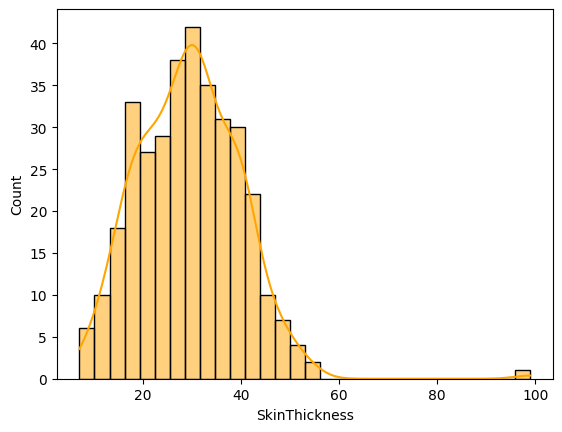

In [20]:
sns.histplot(dados, x='SkinThickness', bins=30, color="orange", kde=True, stat="count");

In [21]:
dados.Insulin.value_counts().sort_index()

16.0     1
18.0     1
22.0     1
23.0     2
36.0     1
        ..
540.0    1
543.0    1
579.0    1
680.0    1
744.0    1
Name: Insulin, Length: 124, dtype: int64

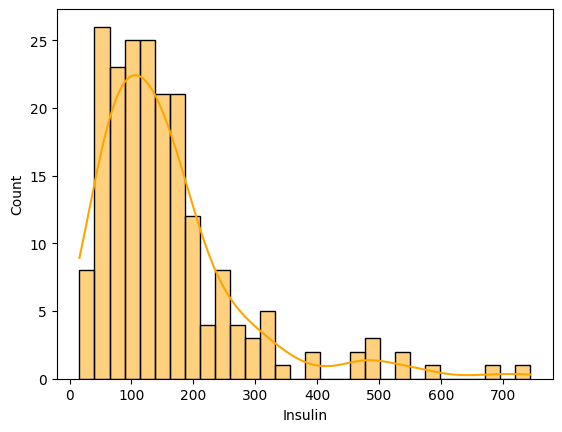

In [22]:
sns.histplot(dados, x='Insulin', bins=30, color="orange", kde=True, stat="count");

In [23]:
dados.BMI.value_counts().sort_index()

18.2    2
18.4    1
19.1    1
19.3    1
19.4    1
       ..
50.0    1
52.3    2
52.9    1
55.0    1
57.3    1
Name: BMI, Length: 221, dtype: int64

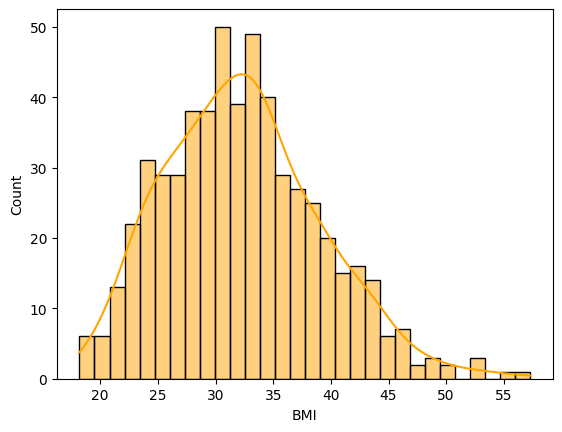

In [24]:
sns.histplot(dados, x='BMI', bins=30, color="orange", kde=True, stat="count");

In [25]:
dados.DiabetesPedigreeFunction.value_counts().sort_index()

0.078    1
0.084    1
0.085    2
0.088    2
0.092    1
        ..
1.781    1
1.893    1
2.137    1
2.288    1
2.329    1
Name: DiabetesPedigreeFunction, Length: 400, dtype: int64

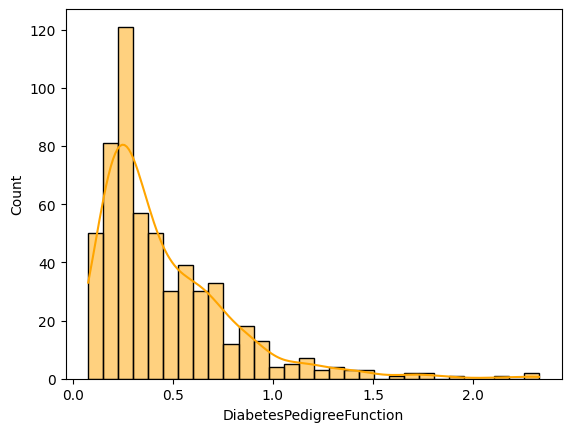

In [26]:
sns.histplot(dados, x='DiabetesPedigreeFunction', bins=30, color="orange", kde=True, stat="count");

Analise e tratamento

In [27]:
dados.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
#Dados faltosos
dados.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [29]:
#Pegando os doentes e os saudáveis

# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#dados['column'].fillna(dados['column'].mean(), inplace=True)


# Separar entre saudáveis e diabéticos para adicionar o valores faltantes
saudaveis = dados[dados['Outcome']==0].copy()
doentes = dados[dados['Outcome']==1].copy()

# Preencher dados faltantes usando a mediana da classe
for column in saudaveis.columns[:-1]:
    saudaveis[column].fillna(saudaveis[column].median(), inplace=True)

for column in doentes.columns[:-1]:
    doentes[column].fillna(doentes[column].median(), inplace=True)

dados = pd.concat([saudaveis, doentes])

dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
4,5,116.0,74.0,27.0,105.0,25.6,0.201,30,0
5,10,115.0,72.0,27.0,105.0,35.3,0.134,29,0
8,4,110.0,92.0,27.0,105.0,37.6,0.191,30,0
10,10,139.0,80.0,27.0,105.0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
560,8,154.0,78.0,32.0,175.0,32.4,0.443,45,1
562,0,123.0,72.0,32.0,175.0,36.3,0.258,52,1
564,6,190.0,92.0,32.0,175.0,35.5,0.278,66,1
566,9,170.0,74.0,31.0,175.0,44.0,0.403,43,1


In [30]:
dados.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
#Analise estatistica descritiva

dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,4.106643,121.627622,73.136364,29.190559,139.865385,32.298427,0.459121,34.043706,0.358392
std,3.446995,30.034239,11.965461,8.245174,76.111457,6.676774,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,66.000000,27.000000,105.000000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.000000,105.000000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,139.250000,80.000000,32.000000,175.000000,36.300000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


In [32]:
dados.mode( axis = 0 )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,74.0,27.0,105.0,30.1,0.254,22.0,0.0
1,NaN,107.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN


Analise de outliers

<AxesSubplot: xlabel='Age'>

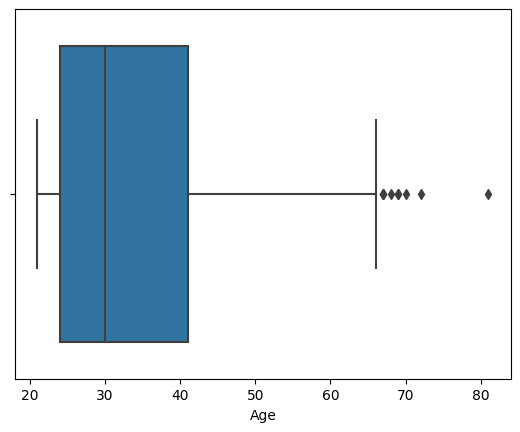

In [33]:
sns.boxplot(data=dados, x="Age")

<AxesSubplot: xlabel='Pregnancies'>

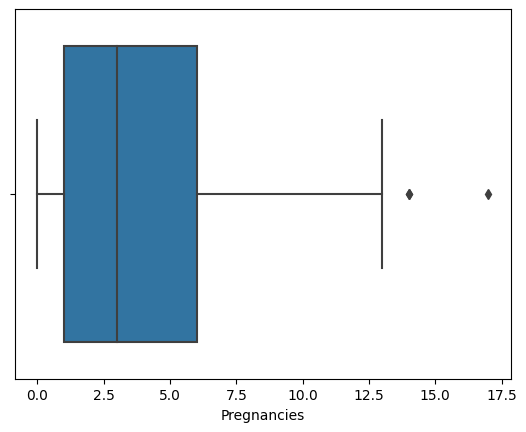

In [34]:
sns.boxplot(data=dados, x="Pregnancies")

<AxesSubplot: xlabel='Glucose'>

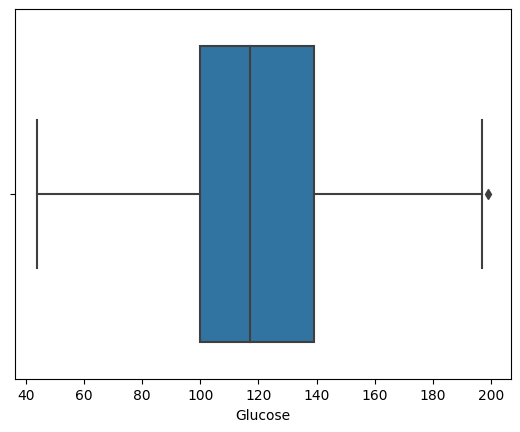

In [35]:
sns.boxplot(data=dados, x="Glucose")

<AxesSubplot: xlabel='BloodPressure'>

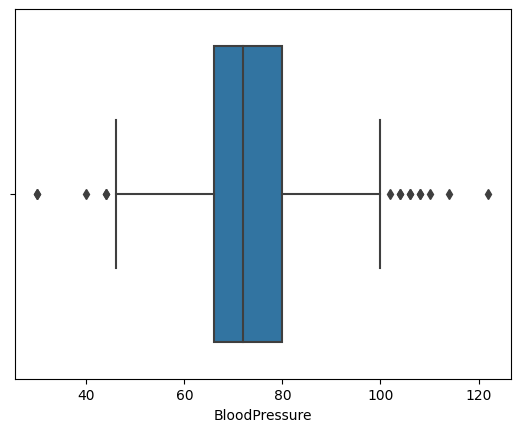

In [36]:
sns.boxplot(data=dados, x="BloodPressure")

<AxesSubplot: xlabel='SkinThickness'>

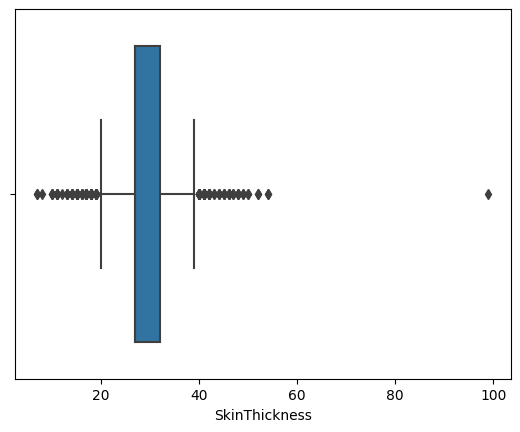

In [37]:
sns.boxplot(data=dados, x="SkinThickness")

<AxesSubplot: xlabel='Insulin'>

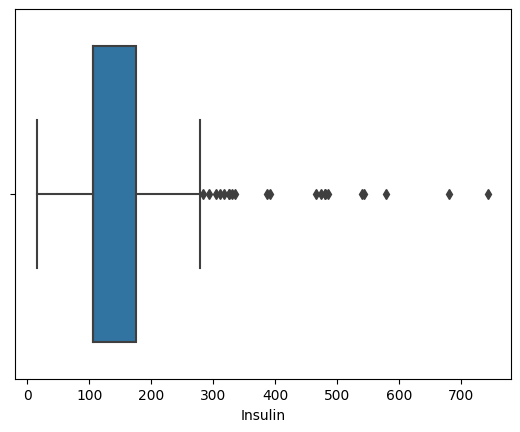

In [38]:
sns.boxplot(data=dados, x="Insulin")

<AxesSubplot: xlabel='BMI'>

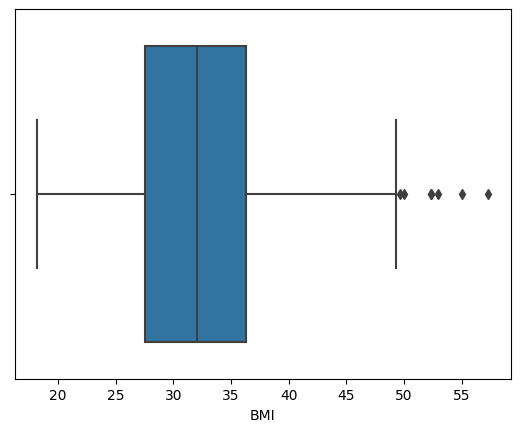

In [39]:
sns.boxplot(data=dados, x="BMI")

<AxesSubplot: xlabel='DiabetesPedigreeFunction'>

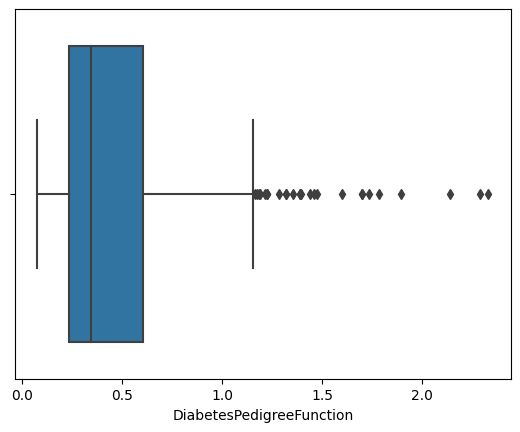

In [40]:
sns.boxplot(data=dados, x="DiabetesPedigreeFunction")

Atributos previsoes e alvos

In [41]:
dados.shape


(572, 9)

In [42]:
previsores = dados.iloc[:, 0:8].values #Pega os valores em formato de matriz

previsores.shape

(572, 8)

In [43]:
previsores

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       [1.00e+01, 1.15e+02, 7.20e+01, ..., 3.53e+01, 1.34e-01, 2.90e+01],
       ...,
       [6.00e+00, 1.90e+02, 9.20e+01, ..., 3.55e+01, 2.78e-01, 6.60e+01],
       [9.00e+00, 1.70e+02, 7.40e+01, ..., 4.40e+01, 4.03e-01, 4.30e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01]])

In [44]:
alvo = dados.iloc[:, 8].values #pega os valores em formato de matriz

alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
alvo.shape

(572,)

Padronizando e Normalizando os atributos

Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [46]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [47]:
previsores_esc

array([[-0.9020501 , -1.22059634, -0.5969356 , ..., -0.85421703,
        -0.32195015, -0.25168518],
       [ 0.25939651, -0.18753757,  0.07224061, ..., -1.00412104,
        -0.76860425, -0.33437554],
       [ 1.71120477, -0.22086205, -0.09505344, ...,  0.44994791,
        -0.96810975, -0.4170659 ],
       ...,
       [ 0.54975816,  2.27847368,  1.57788711, ...,  0.47992871,
        -0.53932181,  2.64247753],
       [ 1.42084312,  1.61198415,  0.07224061, ...,  1.75411285,
        -0.16711006,  0.74059918],
       [-0.9020501 ,  0.14570719, -1.09881777, ..., -0.32955297,
        -0.32790554,  1.07136063]])

In [48]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-0.902050,-1.220596,-0.596936,-0.023132,-0.458484,-0.854217,-0.321950,-0.251685
1,0.259397,-0.187538,0.072241,-0.265910,-0.458484,-1.004121,-0.768604,-0.334376
2,1.711205,-0.220862,-0.095053,-0.265910,-0.458484,0.449948,-0.968110,-0.417066
3,-0.030965,-0.387484,1.577887,-0.265910,-0.458484,0.794727,-0.798381,-0.334376
4,1.711205,0.578925,0.574123,-0.265910,-0.458484,-0.779265,2.923736,1.898264
...,...,...,...,...,...,...,...,...
567,1.130481,1.078793,0.406829,0.341036,0.462025,0.015226,-0.048002,0.905980
568,-1.192412,0.045734,-0.095053,0.341036,0.462025,0.599852,-0.598876,1.484812
569,0.549758,2.278474,1.577887,0.341036,0.462025,0.479929,-0.539322,2.642478
570,1.420843,1.611984,0.072241,0.219647,0.462025,1.754113,-0.167110,0.740599


In [49]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7
count,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02
mean,-2.484415e-17,1.242208e-16,-3.167629e-16,7.453245e-17,2.484415e-17,8.447012e-16,1.739091e-16,3.726623e-17
std,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00
min,-1.192412e+00,-2.586900e+00,-3.608229e+00,-2.693695e+00,-1.628845e+00,-2.113411e+00,-1.134861e+00,-1.078589e+00
25%,-9.020501e-01,-7.207292e-01,-5.969356e-01,-2.659103e-01,-4.584842e-01,-7.193034e-01,-6.643850e-01,-8.305177e-01
50%,-3.213268e-01,-1.542131e-01,-9.505344e-02,-2.659103e-01,-4.584842e-01,-4.473534e-02,-3.413052e-01,-3.343755e-01
75%,5.497582e-01,5.872565e-01,5.741228e-01,3.410358e-01,4.620246e-01,5.998519e-01,4.358730e-01,5.752185e-01
max,3.743736e+00,2.578394e+00,4.087298e+00,8.474114e+00,7.944447e+00,3.747836e+00,5.567929e+00,3.882833e+00


Salvando Variaveis

In [50]:
import pickle

In [51]:
#Criando arquivo
arq1 = open('dados_tratados.pkl', 'wb')

In [52]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [53]:
# Fechando arquivo
arq1.close()

In [54]:
# Lendo arquivo
arq1 = open('dados_tratados.pkl', 'rb')

In [55]:
# Chamando a variável
alvo = pickle.load(arq1)

In [56]:
alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
# Criando arquivos e Salvando as variáveis
arq2 = open('dados', 'wb')
pickle.dump(previsores, arq2)

In [58]:
arq2 = open('dados', 'rb')

In [59]:
previsores = pickle.load(arq2)

In [60]:
previsores

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       [1.00e+01, 1.15e+02, 7.20e+01, ..., 3.53e+01, 1.34e-01, 2.90e+01],
       ...,
       [6.00e+00, 1.90e+02, 9.20e+01, ..., 3.55e+01, 2.78e-01, 6.60e+01],
       [9.00e+00, 1.70e+02, 7.40e+01, ..., 4.40e+01, 4.03e-01, 4.30e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01]])

Treino e teste

In [61]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)

In [62]:
print(x_teste.shape)
print(y_teste.shape)

(172, 8)
(172,)


Juntando o dado tratado e convertendo pra panda

In [63]:
dfx_treino = pd.DataFrame(x_treino, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

dfy_treino = pd.DataFrame(y_treino, columns = ['Outcome'])

result_treino = pd.concat([dfx_treino, dfy_treino], axis=1)

print(result_treino.shape)

(400, 9)


In [64]:
dfx_teste = pd.DataFrame(x_teste, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

dfy_teste = pd.DataFrame(y_teste, columns = ['Outcome'])

result_teste = pd.concat([dfx_teste, dfy_teste], axis=1)

print(result_teste.shape)

(172, 9)


Codigo do professor

In [65]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Atividade para trabalhar o pré-processamento dos dados.

Criação de modelo preditivo para diabetes e envio para verificação de peformance
no servidor.

@author: Aydano Machado <aydano.machado@gmail.com>
"""

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
#result_treino
#result_teste

data = result_treino

#print(result)

# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta algera o array a seguir.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data.Outcome

# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('diabetes_app.csv')
data_app = data_app[feature_cols]
y_pred = neigh.predict(data_app)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Human_learing"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")


 - Lendo o arquivo com o dataset sobre diabetes
 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset
 - Criando modelo preditivo
 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"error":{"code":101,"message":"Erro ao verificar o desenvolvedor: Human_learing"}} 



Accuracy

In [69]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_treino, y_treino)
previsoes_knn = knn.predict(x_teste)

print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 88.37%


Cross Validation

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 79.20%
